In [187]:
#Using Goole Colab : Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder,LabelBinarizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline


import warnings
warnings.filterwarnings('ignore')

print('Modules Imported')

Modules Imported


##Problem Statement
```
The San Francisco Controller's Office maintains a database of the salary and benefits paid to City employees since fiscal year 2013. The problem here is to predict the Total Compensation.
```

In [189]:
#Feature Description
feat_desc= pd.read_excel('/content/drive/MyDrive/Employee Compensation Analysis/Data Dictionary.xlsx')
feat_desc

,Feature,Description
0,Year Type,Fiscal (July through June) or Calendar (Januar...
1,Year,An accounting period of 12 months. The City an...
2,Organization Group,Org Group is a group of Departments. For examp...
3,Department Code,Departments are the primary organizational uni...
4,Union,Unions represent employees in collective barga...
5,Job Family Code,Job Family combines similar Jobs into meaningf...
6,Job Code,Jobs are defined by the Human Resources classi...
7,Employee Identifier,Each distinct number in the “Employee Identifi...
8,Retirement,City contributions to employee retirement plans.
9,Health and Dental,City-paid premiums to health and dental insura...


### Define the following functions as per the description, so that they can be called later to perform the tasks.

In [190]:
# to treat missing values

def treat_null_values(df, method):
    """Treats the missing values in the dataframe.
    
    This function accepts a dataframe and the method to treat the missing value.
    Depending on the method passed, impute/drop the missing values.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to treat the missing values
    method -- method to treat the missing values
    """
    if (method=='drop'):
      df.dropna(inplace=True)
    elif (method=='backfill'):
      df.fillna(method='backfill', inplace=True)
    else:
      df.fillna(method='ffill', inplace=True)     
    

In [191]:

# to seperate the numerical and categorical columns

def num_and_cat_columns(df):
    """Return seperate list of numerical & categorical columns.
    
    This function accepts a dataframe and returns two lists,
    one containing the names of numerical columns(num_cols) and the other categorical columns(cat_cols).
        
    Keyword arguments:
    df -- pandas dataframe for which we want the list of columns
    
    Returns:
    num_cols -- list of numerical columns
    cat_cols -- list of categorical columns
    """
    num_cols = df.columns(include=['int64', 'float64'])
    print(num_cols)
    cat_cols=  df.columns(include=['object'])
    print(cat_cols)
    

In [192]:
# to encode the categorical column so as to convert them to numeric.
    
def encode_category(df, enc, col, method):
    """Encodes the categorical columns of the dataframe.
    
    This function accepts a dataframe and columns to be encoded along with the method to be used for encoding.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to encode the columns -- this dataframe would be transformed
    enc -- the encoder - fitted on the train data
    col -- list of columns that is to be encoded
    method -- method to be used while encoding
    
    Returns:
    df1 -- the encoded dataframe
    """
    if (method == 'Label'):
      df[col]=enc.fit_transform(df[col])
    else:
      df[col]=enc.fit_transform(df[col])

    

In [193]:
# to clean the dollar sign from the currency column & convert it to float.
    
def clean_dollar(df, col):
    """Removes "$" sign from a column & converts it to float.
    
    This function accepts a dataframe and columns with $ sign to be converted to float.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to encode the columns
    col -- list of columns that is to be converted
    
    Returns:
    df -- the converted dataframe
    """
    df[col]=df[col].str.replace('$','').astype(float)
    return df[col]    


In [194]:
# to check outliers using box plot

def check_outliers(df, col, cat):
    """Check outliers through boxplot.
    
    This function plots and displays the boxplot of the feature col vs all the categories defined. 
    Check for any outlier present.
        
    Keyword arguments:
    df -- pandas dataframe which has the data
    col -- the feature for which we want to plot the boxplot
    cat -- features (categorical) by which we want to check the outliers (for each category in each feature)
    """
    sns.boxplot( x=df[cat],y=df[col] );

    

### Read the dataset and look at the dataset. 



In [195]:
# Read the dataset and extract the test  and train data separately
df_train=pd.read_csv('/content/drive/MyDrive/Employee Compensation Analysis/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/Employee Compensation Analysis/test.csv')

# Dropping Ids
train_id = df_train['Id']

df_train.drop(['Id'], axis=1, inplace=True)


In [196]:
# Examine first 5 rows
df_train.head()

,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Employee Identifier,Retirement,Health and Dental,Other Benefits,Total Compensation
0,Calendar,2018,Community Health,NaN,"Prof & Tech Eng, Local 21",Information Systems,IS Business Analyst-Principal,8594384,$0.0,$13527.66,$0.0,0.00
1,Calendar,2014,"Public Works, Transportation & Commerce",MTA Municipal Transprtn Agncy,"SEIU - Miscellaneous, Local 1021",Public Service Aide,Publ Svc Aide-Asst To Prof,22142,$0.0,$3995.56,$875.27,16176.35
2,Fiscal,2018,General City Responsibilities,NaN,"SEIU, Local 1021, Misc","Payroll, Billing & Accounting",Senior Account Clerk,8512172,$0.0,$0.0,$0.0,248.30
3,Fiscal,2015,Community Health,DPH Public Health,"SEIU - Miscellaneous, Local 1021",Purchasing & Storekeeping,Sr Materials & Supplies Sprv,47593,$11671.59,$10680.55,$4400.24,80020.86
4,Fiscal,2014,Community Health,DPH Public Health,"SEIU - Miscellaneous, Local 1021",Hospital Administration,Medical Records Technician,47549,$14617.66,$12464.61,$5562.09,101207.38


In [197]:
# No. of rows and columns
print(df_train.shape)

# Examine the column names
print(df_train.columns)


(567103, 12)
Index(['Year Type', 'Year', 'Organization Group', 'Department', 'Union',
       'Job Family', 'Job', 'Employee Identifier', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Compensation'],
      dtype='object')


In [198]:
# Examine no. of non null entries, and column datatype
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567103 entries, 0 to 567102
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year Type            567103 non-null  object 
 1   Year                 567103 non-null  int64  
 2   Organization Group   567103 non-null  object 
 3   Department           272038 non-null  object 
 4   Union                566758 non-null  object 
 5   Job Family           567103 non-null  object 
 6   Job                  567100 non-null  object 
 7   Employee Identifier  567103 non-null  int64  
 8   Retirement           567103 non-null  object 
 9   Health and Dental    567103 non-null  object 
 10  Other Benefits       567103 non-null  object 
 11  Total Compensation   567103 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 51.9+ MB


In [199]:
#Calculate Summary Statistics
df_train.describe()

,Year,Employee Identifier,Total Compensation
count,567103.000000,5.671030e+05,567103.000000
mean,2016.718106,4.502940e+06,82952.016002
std,1.983861,4.306688e+06,74338.078988
min,2013.000000,1.000000e+00,-42615.240000
25%,2015.000000,2.959550e+04,6946.620000
50%,2017.000000,8.497001e+06,78706.040000
75%,2018.000000,8.556148e+06,133852.340000
max,2020.000000,1.223014e+07,807175.090000


In [200]:
#Describing categorical data - 'object'
df_train.describe(include='object')

,Year Type,Organization Group,Department,Union,Job Family,Job,Retirement,Health and Dental,Other Benefits
count,567103,567103,272038,566758,567103,567100,567103,567103,567103
unique,2,7,56,121,59,1123,227345,115380,272977
top,Calendar,"Public Works, Transportation & Commerce",DPH Public Health,"SEIU, Local 1021, Misc",Nursing,Transit Operator,$0.0,$0.0,$0.0
freq,325445,143163,59048,112750,55690,36209,171690,95338,99592


### Visualize and Preprocess the data



In [201]:
#Checking Null values
df_train.isnull().sum()

Year Type                   0
Year                        0
Organization Group          0
Department             295065
Union                     345
Job Family                  0
Job                         3
Employee Identifier         0
Retirement                  0
Health and Dental           0
Other Benefits              0
Total Compensation          0
dtype: int64

In [202]:
#Too much null values in Department 

#Dropping department column
df_train.drop('Department',axis=1,inplace=True)
df_test.drop('Department',axis=1,inplace=True)

#For null values in Job and Union column - calling treat_null_values() ftn
treat_null_values(df_train, 'ffill')
treat_null_values(df_test, 'ffill')



In [203]:
#Checking null values
df_train.isnull().sum()

Year Type              0
Year                   0
Organization Group     0
Union                  0
Job Family             0
Job                    0
Employee Identifier    0
Retirement             0
Health and Dental      0
Other Benefits         0
Total Compensation     0
dtype: int64

In [204]:
# Columns with compensations stored in form of strings. We need to clean it and convert this to numeric. 
# Calling the clean_dollar() to do it.

clean_dollar(df_train, 'Retirement')
clean_dollar(df_train, 'Health and Dental')
clean_dollar(df_train, 'Other Benefits')

clean_dollar(df_test, 'Retirement')
clean_dollar(df_test, 'Health and Dental')
clean_dollar(df_test, 'Other Benefits')


0            0.00
1          753.13
2         4464.84
3         1787.63
4         2015.35
           ...   
177215    6267.86
177216    2216.86
177217    2175.79
177218    3900.18
177219    5272.32
Name: Other Benefits, Length: 177220, dtype: float64

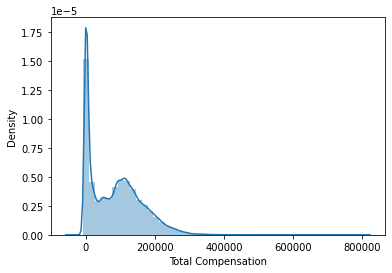

In [205]:
#Target Variable
sns.distplot(df_train['Total Compensation'])

#Right Skewed
#Some values are below zero 

Public Works, Transportation & Commerce     143163
General City Responsibilities               115950
Community Health                             98325
Public Protection                            86872
General Administration & Finance             41322
Human Welfare & Neighborhood Development     40839
Culture & Recreation                         40632
Name: Organization Group, dtype: int64


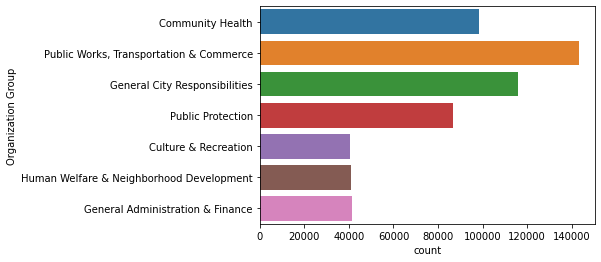

In [206]:
#Organization Group
sns.countplot(y=df_train['Organization Group'])

print(df_train['Organization Group'].value_counts())

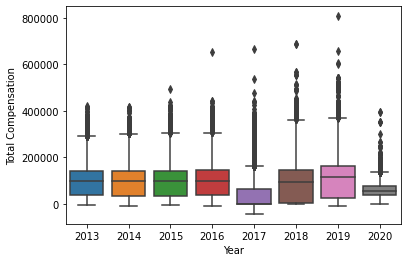

In [207]:
#Check outliers by calling the check_outliers(df, col, cat) function.
#col - cont (y-axis)
#cat - wrt outliers are shown (x-axis)

#Outlier check total comoensation wrt Year
check_outliers(df_train, 'Total Compensation', 'Year')

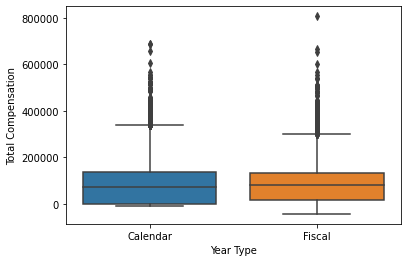

In [208]:
#Outlier check total comoensation wrt Year Type
check_outliers(df_train, 'Total Compensation', 'Year Type')

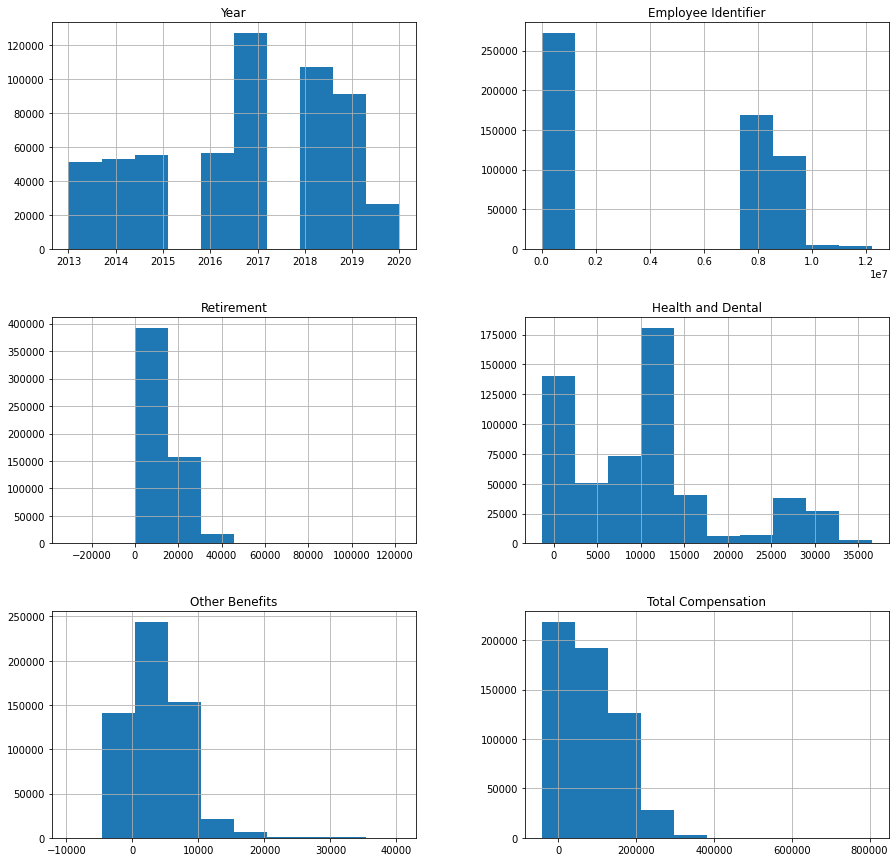

In [209]:
# Distribution of numerical columns

data_distribution = df_train.hist(figsize=(15,15))
plt.show();


In [210]:
# Before we proceed with the model fitting, we need to get rid of the categorical columns.
#Calling the encode_category() with the list of columns and the method of encoding to do the same.

label_encoder=LabelEncoder()
hot_encoder = LabelBinarizer()

col =['Year Type', 'Organization Group', 'Job Family', 'Job', 'Union']
for i in col:
  encode_category(df_train, label_encoder, i, "Label")
  encode_category(df_test, label_encoder, i, "Label")


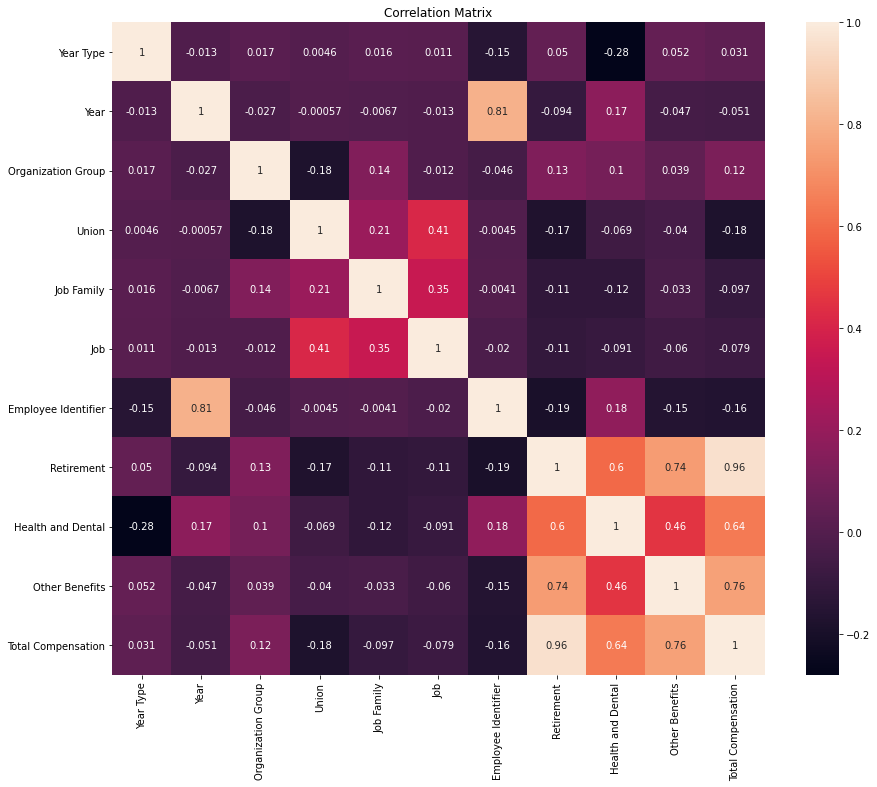

In [211]:
# correlation
corr = df_train.corr()

plt.figure(figsize=(15,12))
plt.title('Correlation Matrix')
sns.heatmap(corr,square=True,annot = True)
plt.show();

# Not including - Year Type, Year, Job Family, Job

### Model building


In [212]:
#Splitting training set

X=df_train[['Organization Group','Union','Employee Identifier', 'Retirement', 'Health and Dental', 'Other Benefits']]
y=df_train['Total Compensation']

print(X.head())
print(y.head())


#we split 75% of the data to training set while 25% of the data to validation 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)

#X_train, X_valid shape
print(X_train.shape)
print(X_valid.shape)

   Organization Group  Union  ...  Health and Dental  Other Benefits
0                   0     78  ...           13527.66            0.00
1                   6     90  ...            3995.56          875.27
2                   3     93  ...               0.00            0.00
3                   0     90  ...           10680.55         4400.24
4                   0     90  ...           12464.61         5562.09

[5 rows x 6 columns]
0         0.00
1     16176.35
2       248.30
3     80020.86
4    101207.38
Name: Total Compensation, dtype: float64
(425327, 6)
(141776, 6)


In [213]:
# Fitting Polynomial Feature to the dataset 

poly = PolynomialFeatures(degree = 2) 
X_train_poly = poly.fit_transform(X_train) 
X_valid_poly=poly.transform(X_valid)

In [214]:
# fit the model
linreg = LinearRegression()  

#fit_model
linreg.fit(X_train_poly, y_train)   
y_pred = linreg.predict(X_valid_poly)
    
#RMSE
rmse=np.sqrt(mean_squared_error(y_valid,y_pred))
print(rmse)

# R-squared calculation
r2 = r2_score(y_valid,y_pred)
print(r2)


15911.975321445298
0.9540697324732619


### Prediction on the test data and creating the submission file.



In [215]:
#the Id column in a separate variable : test_id
test_id = df_test['Id']
df_test.drop(['Id'], axis=1, inplace=True) 

#Test data shape and columns names
print(df_test.shape)
print(df_test.columns)

(177220, 10)
Index(['Year Type', 'Year', 'Organization Group', 'Union', 'Job Family', 'Job',
       'Employee Identifier', 'Retirement', 'Health and Dental',
       'Other Benefits'],
      dtype='object')


In [216]:
#Features selected from test data
X_test=df_test[['Organization Group','Union','Employee Identifier', 'Retirement', 'Health and Dental', 'Other Benefits']]

# transforming Polynomial Feature to the test data 
X_test_poly = poly.transform(X_test) 

#make prediction : Total Compensation
ytest_pred=linreg.predict(X_test_poly)

#Making df for submission
subm=pd.DataFrame({"Id": test_id, "Total Compensation": ytest_pred})
print(subm.head())

   Id  Total Compensation
0   0        11069.115278
1   1       155296.675666
2   2        94999.987703
3   3        15038.811338
4   4        41099.268997


In [217]:
# To CSV for submission
subm.to_csv('submission_1.csv',index=False)

#from google.colab import files
#files.download('submission_1.csv') 